In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/50startups/50_Startups_dataset.csv


## Step-1:Data loading and cleaning

In [2]:
df = pd.read_csv('/kaggle/input/50startups/50_Startups_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.30,136897.90,471784.20,New York,192261.93
1,1,162597.80,151377.69,443898.63,California,191792.16
2,2,153441.61,101145.65,407934.64,Florida,191050.49
3,3,144372.51,118671.95,383199.72,New York,182902.09
4,4,142107.44,91391.87,366168.52,Florida,166188.04


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.30,136897.90,471784.20,New York,192261.93
1,162597.80,151377.69,443898.63,California,191792.16
2,153441.61,101145.65,407934.64,Florida,191050.49
3,144372.51,118671.95,383199.72,New York,182902.09
4,142107.44,91391.87,366168.52,Florida,166188.04


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


 ### Encoding categorical labels as numeric values,

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

In [8]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.30,136897.90,471784.20,2,192261.93
1,162597.80,151377.69,443898.63,0,191792.16
2,153441.61,101145.65,407934.64,1,191050.49
3,144372.51,118671.95,383199.72,2,182902.09
4,142107.44,91391.87,366168.52,1,166188.04


In [9]:
df['State'].value_counts()

State
2    17
0    17
1    16
Name: count, dtype: int64

In [10]:
df.shape

(50, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     int64  
 4   Profit           50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


### Identifying Null and missing values

In [12]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [13]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## Step-2:Data Exploration

In [14]:
df.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

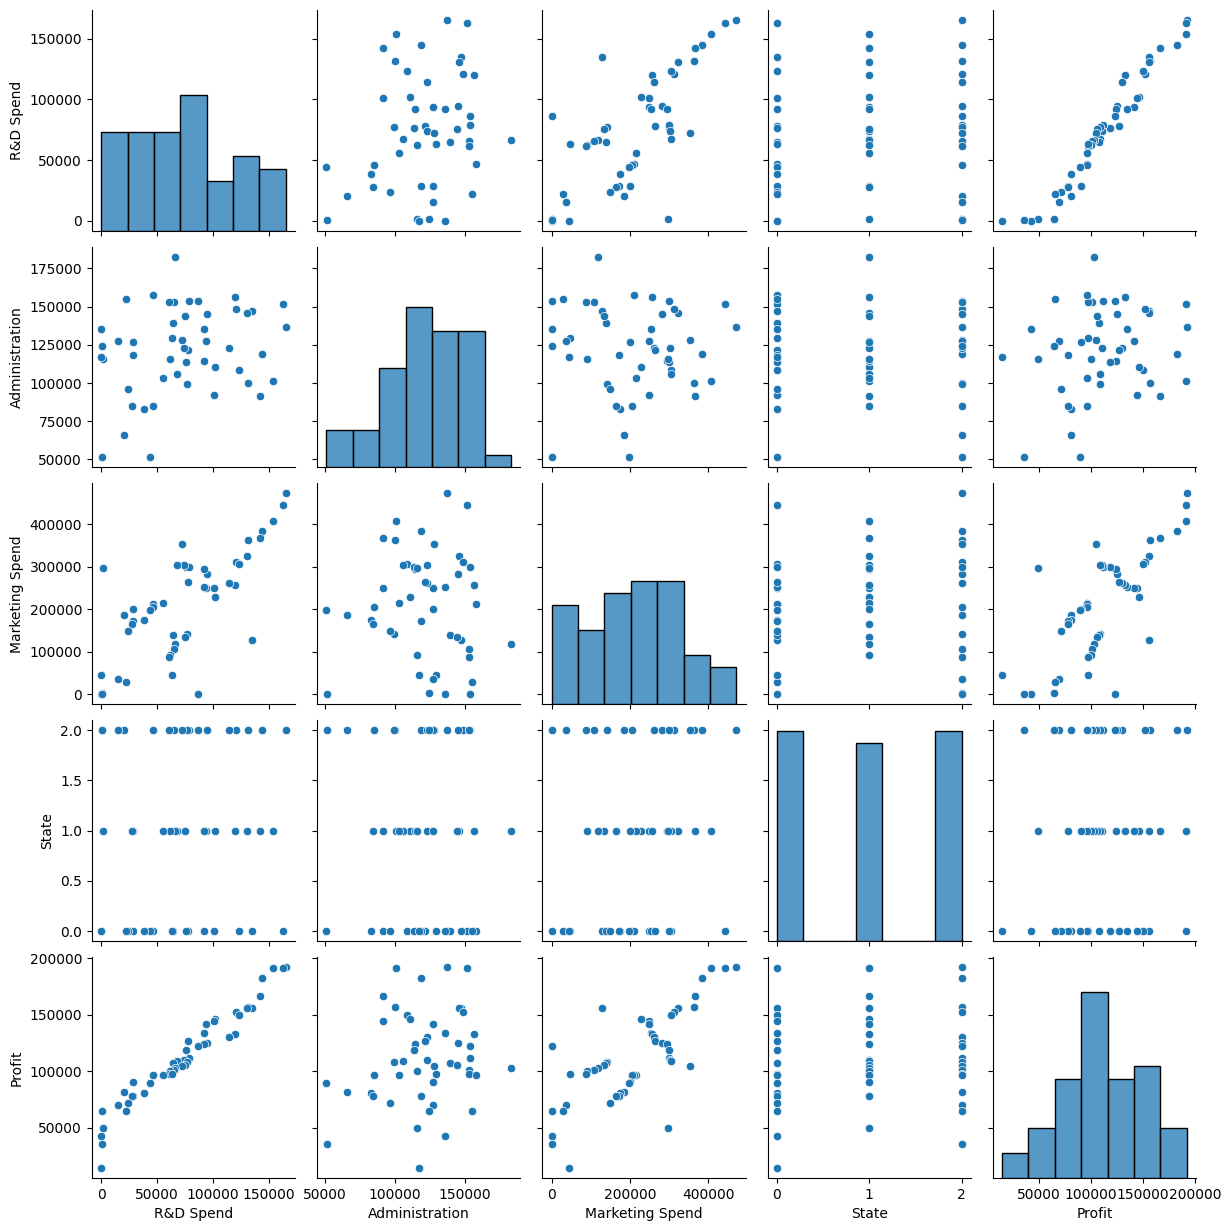

In [15]:
import seaborn as sns
sns.pairplot(df)

### Checking profit distribution

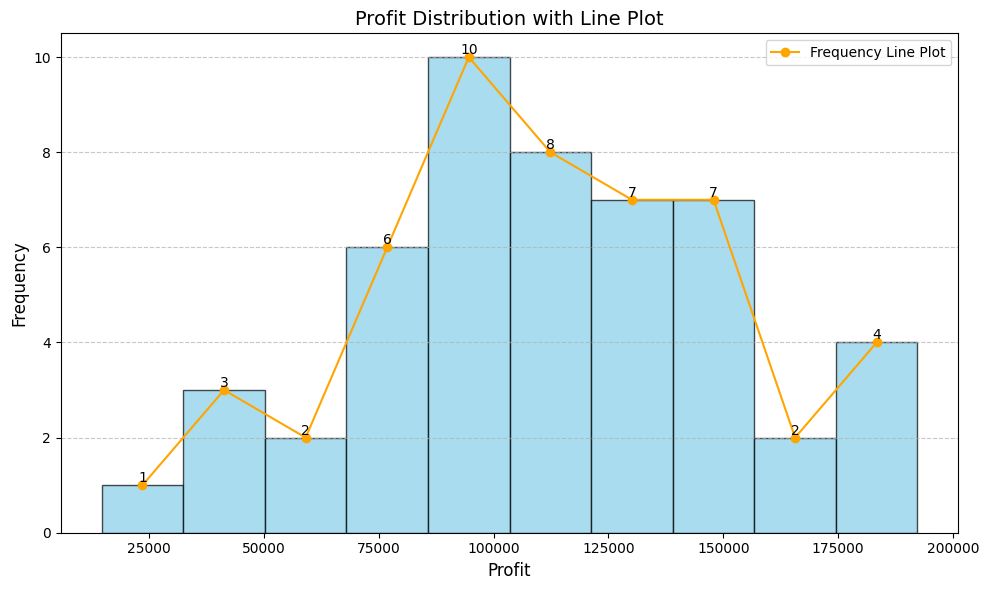

In [16]:
import matplotlib.pyplot as plt
profit_data = df['Profit']

# Create the histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(profit_data, bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# Add frequency counts on top of each bar
for i in range(len(n)):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, n[i], int(n[i]), ha='center', va='bottom', fontsize=10)

# Add a line plot
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calculate the center of each bin
plt.plot(bin_centers, n, '-o', color='orange', label='Frequency Line Plot')

# Customize the plot
plt.title("Profit Distribution with Line Plot", fontsize=14)
plt.xlabel("Profit", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

### Checking relationship between Profits and R&D Spend

Text(0, 0.5, 'R&D Spends')

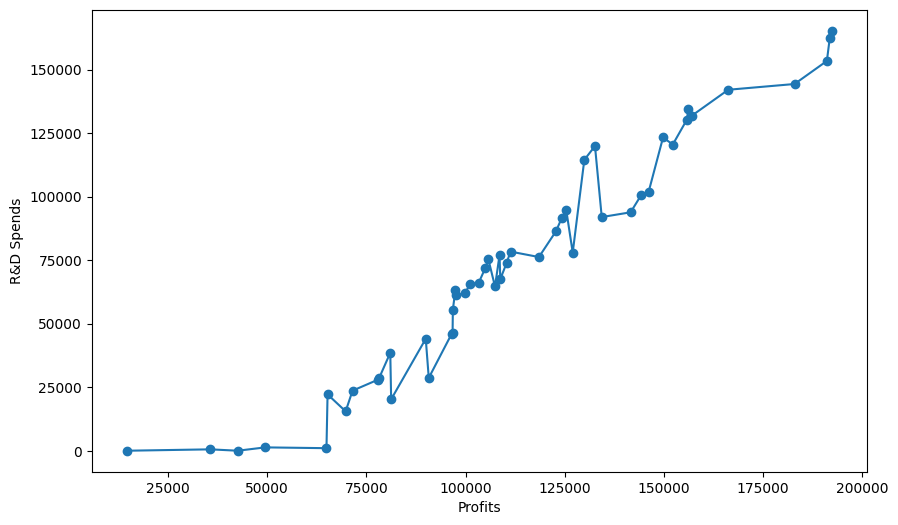

In [17]:
import matplotlib.pyplot as plt

x = df['Profit']
y = df['R&D Spend']


plt.figure(figsize=(10, 6))
plt.scatter(x,y)
plt.plot(x,y)
plt.xlabel("Profits")
plt.ylabel("R&D Spends")


### Checking relationship between Marketing Spends and R&D Spends

Text(0, 0.5, 'R&D Spends')

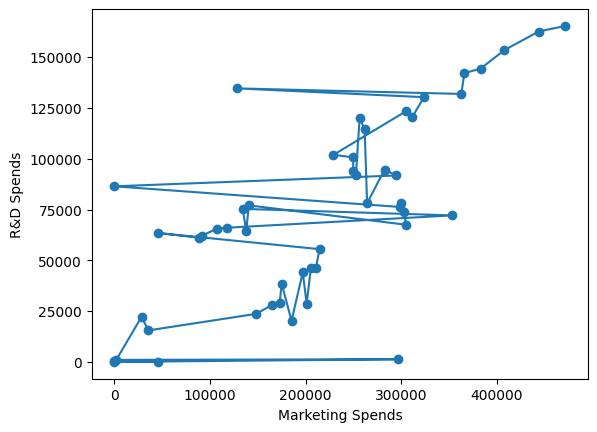

In [18]:
import matplotlib.pyplot as plt

x = df['Marketing Spend']
y = df['R&D Spend']

plt.scatter(x,y)
plt.plot(x,y)
plt.xlabel("Marketing Spends")
plt.ylabel("R&D Spends")

Text(0, 0.5, 'R&D Spends')

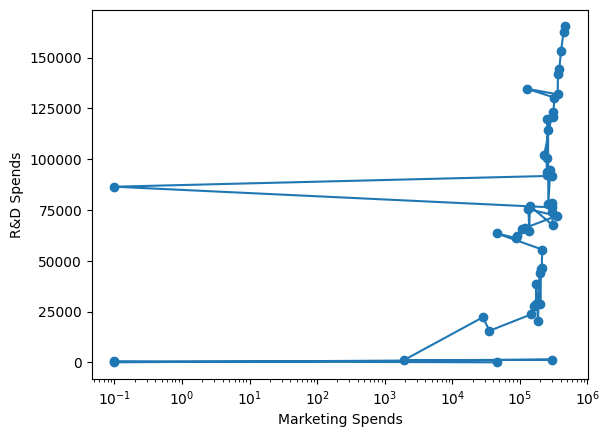

In [19]:
import matplotlib.pyplot as plt

x = df['Marketing Spend']
y = df['R&D Spend']

plt.scatter(x,y)
plt.plot(x,y)
plt.xscale('log')
# plt.yscale('symlog')
plt.xlabel("Marketing Spends")
plt.ylabel("R&D Spends")

## Step-3:Data Preprossing

In [20]:
X= df[['R&D Spend','Administration','Marketing Spend','State']]

In [21]:
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.30,136897.90,471784.20,2
1,162597.80,151377.69,443898.63,0
2,153441.61,101145.65,407934.64,1
3,144372.51,118671.95,383199.72,2
4,142107.44,91391.87,366168.52,1
5,131877.00,99814.81,362861.46,2
6,134615.56,147198.97,127716.92,0
7,130298.23,145530.16,323876.78,1
8,120542.62,148719.05,311613.39,2
9,123334.98,108679.27,304981.72,0


In [22]:
X.shape

(50, 4)

In [23]:
y = df['Profit']

In [24]:
y

0     192261.93
1     191792.16
2     191050.49
3     182902.09
4     166188.04
5     156991.22
6     156122.61
7     155752.70
8     152211.87
9     149760.06
10    146122.05
11    144259.50
12    141585.62
13    134307.45
14    132602.75
15    129917.14
16    126993.03
17    125370.47
18    124267.00
19    122776.96
20    118474.13
21    111313.12
22    110352.35
23    108734.09
24    108552.14
25    107404.44
26    105733.64
27    105008.41
28    103282.48
29    101004.74
30     99937.69
31     97483.66
32     97427.94
33     96779.02
34     96712.90
35     96479.61
36     90708.29
37     89949.24
38     81229.16
39     81005.86
40     78240.01
41     77798.93
42     71498.59
43     69759.08
44     65200.43
45     64926.18
46     49490.85
47     42559.83
48     35673.51
49     14681.50
Name: Profit, dtype: float64

In [25]:
y.shape

(50,)

### Data Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [27]:
X_train

,R&D Spend,Administration,Marketing Spend,State
8,120542.62,148719.05,311613.39,2
3,144372.51,118671.95,383199.72,2
6,134615.56,147198.97,127716.92,0
41,27893.02,84710.87,164470.81,1
46,1315.56,115816.31,297114.56,1
47,0.10,135427.02,0.10,0
15,114523.71,122616.94,261776.33,2
9,123334.98,108679.27,304981.72,0
16,78013.21,121597.65,264346.16,0
24,77044.11,99281.44,140574.91,2


In [28]:
X_train.shape

(37, 4)

In [29]:
y_train

8     152211.87
3     182902.09
6     156122.61
41     77798.93
46     49490.85
47     42559.83
15    129917.14
9     149760.06
16    126993.03
24    108552.14
34     96712.90
31     97483.66
0     192261.93
44     65200.43
27    105008.41
33     96779.02
5     156991.22
29    101004.74
11    144259.50
36     90708.29
1     191792.16
21    111313.12
2     191050.49
43     69759.08
35     96479.61
23    108734.09
40     78240.01
10    146122.05
22    110352.35
18    124267.00
49     14681.50
20    118474.13
7     155752.70
42     71498.59
14    132602.75
28    103282.48
38     81229.16
Name: Profit, dtype: float64

In [30]:
y_train.shape

(37,)

### Data Transformation

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train

array([[ 0.92677074,  0.99706915,  0.68026002,  1.18431305],
       [ 1.42728466, -0.19886227,  1.29883063,  1.18431305],
       [ 1.2223534 ,  0.93656709, -0.90877173, -1.25010822],
       [-1.01920612, -1.55057749, -0.59118489, -0.03289758],
       [-1.57742895, -0.31252214,  0.55497702, -0.03289758],
       [-1.60505838,  0.46802121, -2.01236051, -1.25010822],
       [ 0.80035185, -0.0418442 ,  0.24962277,  1.18431305],
       [ 0.9854204 , -0.59658983,  0.6229564 , -1.25010822],
       [ 0.03349923, -0.08241387,  0.27182842, -1.25010822],
       [ 0.01314463, -0.97064124, -0.79766707,  1.18431305],
       [-0.62994291,  1.35428993, -0.19087808, -1.25010822],
       [-0.32097317,  1.15559889, -1.25007525,  1.18431305],
       [ 1.86787316,  0.52656502,  2.06428062,  1.18431305],
       [-1.13924558,  1.23935083, -1.76752292, -1.25010822],
       [-0.09053785,  0.16702458,  1.03946689,  1.18431305],
       [-0.43948461, -0.82034333, -0.15772172, -0.03289758],
       [ 1.16483373, -0.

In [33]:
from sklearn.linear_model import LinearRegression

## Step-4:Model Training

In [34]:
model = LinearRegression(n_jobs=-1)

In [35]:
model

LinearRegression(n_jobs=-1)

In [36]:
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [37]:
model.coef_

array([38543.82774975, -2248.45751539,  3544.26632383,  -148.26682419])

In [38]:
model.intercept_

114279.72756756756

In [39]:
# prediction for test data
y_pred= model.predict(X_test)

In [40]:
# performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [41]:
print(f"MSE:{round(mse,2)},\nMAE:{round(mae,2)},\nRMSE:{round(rmse,2)}")

MSE:86953191.3,
MAE:7455.85,
RMSE:9324.87


In [42]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [43]:
score

0.9190953762345012

In [44]:
# adjusted r-squared
1 - (1- score)* (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8786430643517518

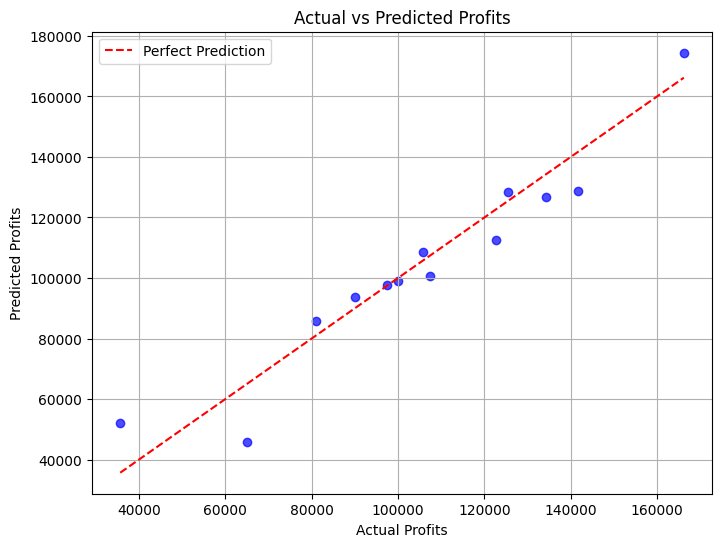

In [45]:
import matplotlib.pyplot as plt
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Actual vs Predicted Profits")
plt.xlabel("Actual Profits")
plt.ylabel("Predicted Profits")
plt.legend()
plt.grid(True)
plt.show()

## Step-5:Model Tunning 

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X= df[['R&D Spend','Marketing Spend','State']]
y = df['Profit']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model_2 = LinearRegression(n_jobs=-1)
model_2.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [47]:
model_2.coef_

array([ 3.73201126e+04,  4.65364224e+03, -2.40090527e+01])

In [48]:
model_2.intercept_

114279.72756756756

In [49]:
# prediction for test data
y_pred_2= model_2.predict(X_test)

In [50]:
# performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
mse = mean_squared_error(y_test,y_pred_2)
mae = mean_absolute_error(y_test,y_pred_2)
rmse = np.sqrt(mse)

In [51]:
print(f"MSE:{round(mse,2)},\nMAE:{round(mae,2)},\nRMSE:{round(rmse,2)}")

MSE:68802479.69,
MAE:6615.44,
RMSE:8294.73


In [52]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_2)

In [53]:
score

0.9359835027337811

In [54]:
# adjusted r-squared
1 - (1- score)* (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.914644670311708

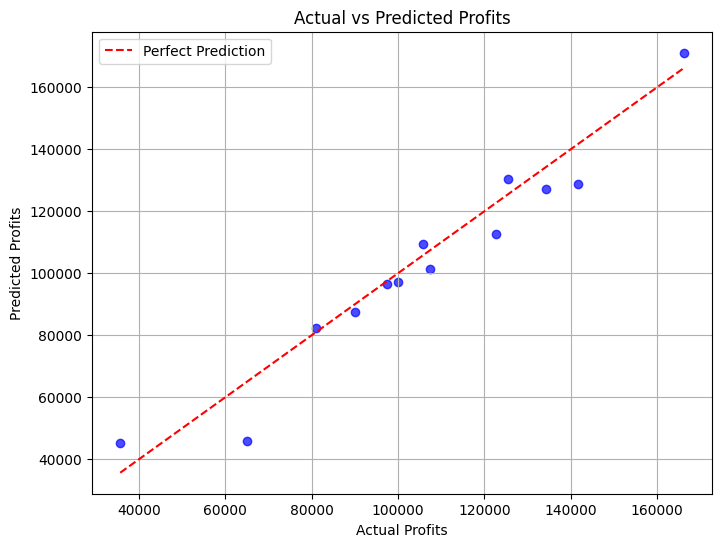

In [55]:
import matplotlib.pyplot as plt
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_2, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Actual vs Predicted Profits")
plt.xlabel("Actual Profits")
plt.ylabel("Predicted Profits")
plt.legend()
plt.grid(True)
plt.show()